In [ ]:
#1.-Extract Data and Loading Data
#2.-Undestand the data: statistics(Describe()) info() shape
#3.-Exploratory Data Analysis (EDA)
#4.-Data Wrangling
#5.-Model

# Extract Data and Loading Data

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('train.csv')

# Undestand the data: statistics(Describe()) info() shape

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
def corr(df):
    df = df.corr()['Purchase'].sort_values()    
    return df

corr(df)

Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Marital_Status       -0.000463
User_ID               0.004716
Occupation            0.020833
Purchase              1.000000
Name: Purchase, dtype: float64

# Exploratory Data Analysis (EDA)

# Univariate analysis

# Target Variable

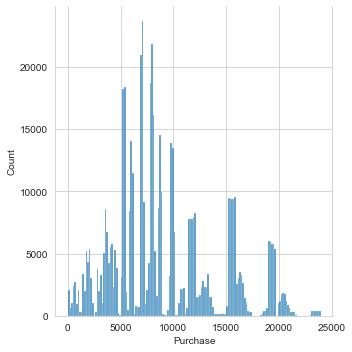

In [15]:
sns.displot(df['Purchase']);

In [ ]:
g = sns.FacetGrid(df,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

In [ ]:
g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

In [ ]:
plt.figure(1) 
plt.subplot(221)
status_vals1 = pd.Series(df['City_Category'].value_counts()) 
(status_vals1/df.shape[0]).plot(kind="bar",title="Item Type", figsize=(20,20))

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Data Wrangling

                     Total   Percent
Product_Category_3  383247  0.696727
Product_Category_2  173638  0.315666
Purchase                 0  0.000000
Product_Category_1       0  0.000000
Marital_Status           0  0.000000


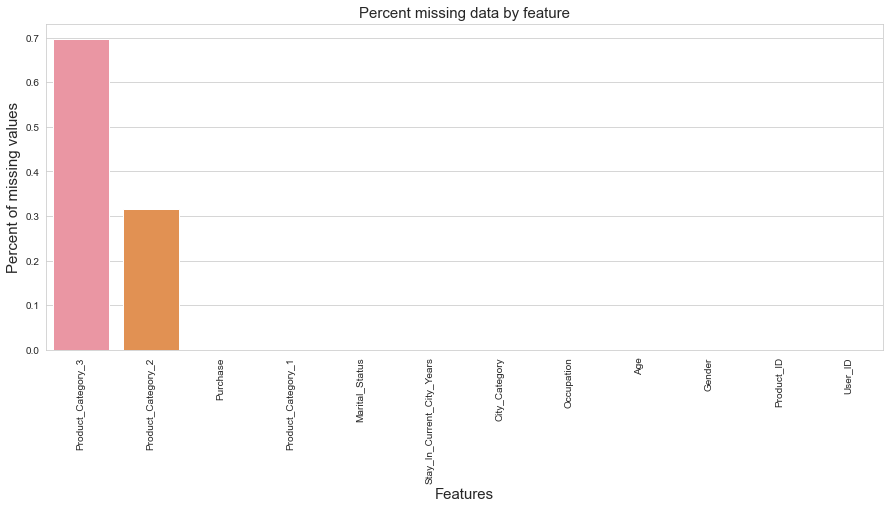

In [18]:
def distribution_of_missingValues(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missingData = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missingData.index, y=missingData['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return missingData.head()

print(distribution_of_missingValues(df))

In [19]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(), inplace=True)

                    Total  Percent
Purchase                0      0.0
Product_Category_3      0      0.0
Product_Category_2      0      0.0
Product_Category_1      0      0.0
Marital_Status          0      0.0


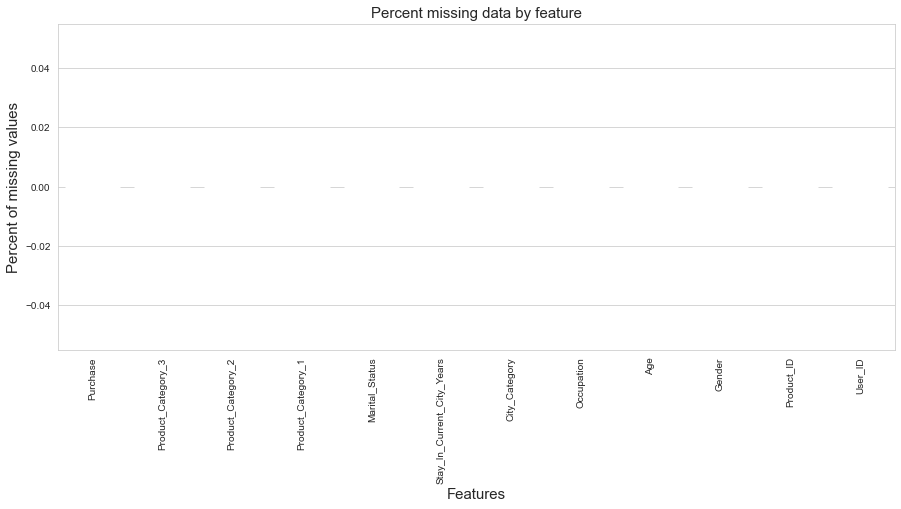

In [21]:
print(distribution_of_missingValues(df))

In [32]:
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [35]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [40]:
df['Gender'] = df['Gender'].map({'F':1,'M':0})

In [ ]:
df["City_Category"] = df["City_Category"].map({'A':1 ,'B':2, 'C':3})

In [ ]:
df = df.drop(['Product_ID','User_ID'],axis=1)

<AxesSubplot:title={'center':'Item Type'}>

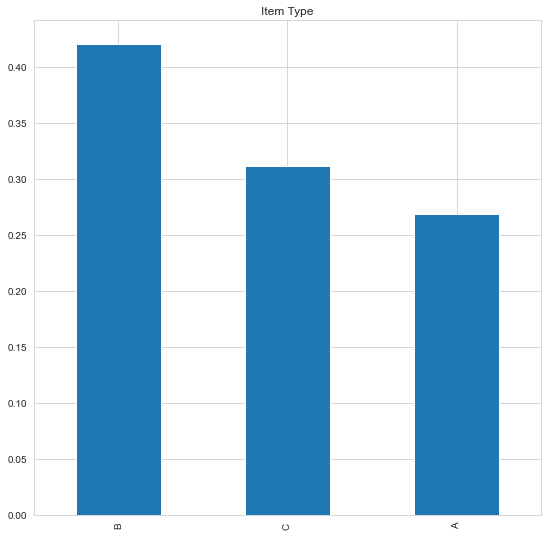

In [57]:
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()

X[:, 1] = labelencoder_X_train.fit_transform(X[:, 1])

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [70]:
X_train

array([[-5.73258531e-01,  1.85085028e+00,  1.06194788e+00, ...,
        -8.65194814e-01,  1.31317596e-04, -3.53384734e-04],
       [-5.73258531e-01,  3.73024596e-01, -1.08497076e+00, ...,
        -1.11931138e+00, -1.86452008e+00,  5.86446836e-01],
       [ 1.74441364e+00, -1.10480109e+00, -7.78268097e-01, ...,
        -1.11931138e+00, -1.15121744e+00,  5.86446836e-01],
       ...,
       [-5.73258531e-01,  3.73024596e-01, -1.64862770e-01, ...,
        -6.11078243e-01, -1.15121744e+00, -3.53384734e-04],
       [ 1.74441364e+00,  1.11193744e+00, -1.08497076e+00, ...,
         6.59504608e-01,  1.31317596e-04, -3.53384734e-04],
       [-5.73258531e-01, -3.65888246e-01, -1.64862770e-01, ...,
        -1.02845103e-01,  1.31317596e-04, -3.53384734e-04]])

In [71]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [72]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [73]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2820
Max leaf nodes: 50  		 Mean Absolute Error:  2240
Max leaf nodes: 100  		 Mean Absolute Error:  2216
Max leaf nodes: 300  		 Mean Absolute Error:  2195
Max leaf nodes: 500  		 Mean Absolute Error:  2189
Max leaf nodes: 700  		 Mean Absolute Error:  2185
Max leaf nodes: 800  		 Mean Absolute Error:  2184
Max leaf nodes: 850  		 Mean Absolute Error:  2183


In [ ]:
regressor = RandomForestRegressor(n_estimators=850, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)